Accuracy: 0.985


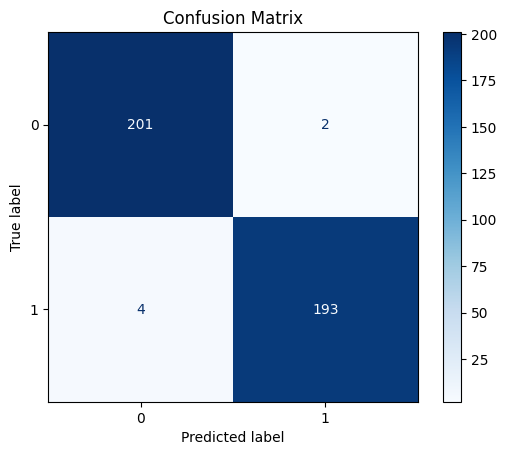

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from icecream import ic
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

# Prepare data
df = pd.read_csv(
    'data/dataset_3.csv', 
    dtype={
        'V1': float, 
        'V2': float,
        'V3': float,
        'V4': float,
        'V5': float,
        'V6': float,
        'target': int
        }
    )
df = shuffle(df)

X = []
y = []

for row in df.iterrows():
    i1 = row[1]['V1']
    i2 = row[1]['V2']
    i3 = row[1]['V3']
    i4 = row[1]['V4']
    i5 = row[1]['V5']
    i6 = row[1]['V6']
    o = row[1]['target']
    
    X.append([i1, i2, i3, i4, i5, i6])
    y.append(o)
    
split_ratio = 0.8
X_split_index = int(len(X) * split_ratio)
y_split_index = int(len(y) * split_ratio)

X_train = X[:X_split_index]     # First 80% of the data
y_train = y[:y_split_index]     # First 80% of the labels
X_test = X[X_split_index:]      # Remaining 20% of the data
y_test = y[y_split_index:]      # Remaining 20% of the labels

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

cv = GridSearchCV(estimator = rf, param_grid = param_grid,
                  cv = 3, n_jobs = -1)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
